In [ ]:
#Import Libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import seaborn as sns
import statsmodels.api as sm

Part 1: Utilizing Logistic Regression

In [ ]:
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

diabetes_prediction_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes_prediction_dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
diabetes_prediction_dataset['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
# Bonus: undersample the diabetes_prediction_dataset such that we have 8500 observations of diabetes = 0, and 8500 of diabetes = 1

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_undersampled = df1.sample(n=8500, random_state=123)
df0_undersampled = df0.sample(n=8500, random_state=123)

diabetes_prediction_dataset_undersampled = pd.concat([df0_undersampled, df1_undersampled])

diabetes_prediction_dataset_undersampled = diabetes_prediction_dataset_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_undersampled

In [ ]:
diabetes_prediction_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Convert relevant variables to dummies.
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=True)

diabetes_prediction_dataset.head(20)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0,0,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0,1,0
5,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0,0,0
6,44.0,0,0,19.31,6.5,200,1,0,0,0,1,0,0,0
7,79.0,0,0,23.86,5.7,85,0,0,0,0,0,0,0,0
8,42.0,0,0,33.64,4.8,145,0,0,0,0,1,0,1,0
9,32.0,0,0,27.32,5.0,100,0,0,0,0,1,0,0,0


In [ ]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_prediction_dataset.copy()
X = X.drop(columns='diabetes')

# Create the target DataFrame, y
y = diabetes_prediction_dataset['diabetes']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

In [ ]:
#fit logistic regression

logistic_regression_model = LogisticRegression(max_iter = 1000,random_state=1)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
#score logistic regression

print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.9609466666666666
Testing Data Score: 0.95892


In [ ]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df_train = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df_train

,Prediction,Actual
98980,0,0
69824,0,0
9928,0,0
75599,0,0
95621,1,1
...,...,...
6265,0,0
54886,0,0
76820,0,0
860,0,0


In [ ]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df_test = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": y_test})

results_df_test

,Testing Data Predictions,Testing Data Actual Targets
75721,0,0
80184,0,0
19864,0,0
76699,0,0
92991,0,1
...,...,...
21271,0,0
34014,0,0
81355,0,0
65720,0,0


In [ ]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.95892

In [ ]:
# generate a summary of the logistic regression model we made

print(logistic_regression_model.intercept_)

print(logistic_regression_model.coef_)

intercept = logistic_regression_model.intercept_

coefs = logistic_regression_model.coef_

[-28.00175604]
[[ 0.04702082  0.70547253  0.72857671  0.08854845  2.36111183  0.03360226
   0.74856566  0.61875946  0.58797986  0.54507956  0.54867529  0.23856532
  -0.03378638]]


In [ ]:
# formula for the model, *IF* it were a linear model:
print(intercept[0], "+")
for i in range(len(X_train.columns)):
  if i+1 < len(X_train.columns):
    print(f"{coefs[0][i]} * {X_train.columns[i]} + ")
  else:
    print(f"{coefs[0][i]} * {X_train.columns[i]}")

-28.00175604075212 +
0.04702081964697265 * age + 
0.7054725288346438 * hypertension + 
0.728576710588803 * heart_disease + 
0.08854845203145505 * bmi + 
2.36111182647362 * HbA1c_level + 
0.03360226090713915 * blood_glucose_level + 
0.7485656601026756 * smoking_history_current + 
0.6187594638760086 * smoking_history_ever + 
0.5879798620952849 * smoking_history_former + 
0.545079562885472 * smoking_history_never + 
0.5486752931757328 * smoking_history_not current + 
0.23856532403999306 * gender_Male + 
-0.033786384912889655 * gender_Other


In [ ]:
# prompt: do a vif test of all the variables in X_train

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['vif_value'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif

,features,vif_value
0,age,5.929404
1,hypertension,1.157110
2,heart_disease,1.117309
3,bmi,16.289233
4,HbA1c_level,17.135144
5,blood_glucose_level,11.589427
6,smoking_history_current,1.291620
7,smoking_history_ever,1.136854
8,smoking_history_former,1.392876
9,smoking_history_never,2.101244


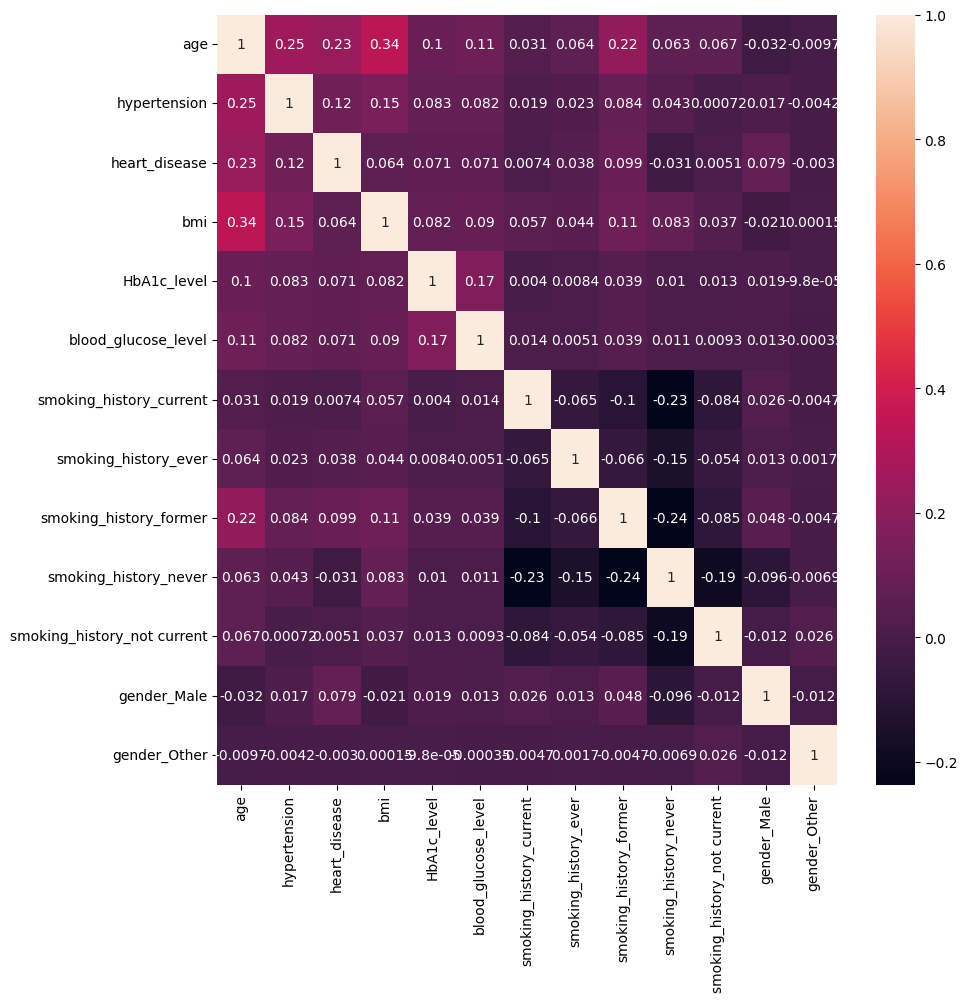

In [ ]:
# do a correlation plot of the X_train variables

plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()


In [ ]:
# do a significance test of the variables in the logistic regression with max iterations set to 1000

# Add a constant term to the predictor matrix
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logistic_regression_model_sm = sm.Logit(y_train, X_train_sm).fit(maxiter=2000,random_state=1)

# Print the summary of the logistic regression model
print(logistic_regression_model_sm.summary())

# Check the significance of the variables
for i, p_value in enumerate(logistic_regression_model_sm.pvalues[1:]):
    if p_value < 0.05:
        print(f"Variable '{X_train.columns[i]}' is significant (p-value = {p_value})")
    else:
        print(f"Variable '{X_train.columns[i]}' is not significant (p-value = {p_value})")



/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: random_state. After release 0.14, this will raise.
  warnings.warn(


         Current function value: 0.112113
         Iterations: 2000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                75000
Model:                          Logit   Df Residuals:                    74986
Method:                           MLE   Df Model:                           13
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.6134
Time:                        23:51:05   Log-Likelihood:                -8408.5
converged:                      False   LL-Null:                       -21752.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -27.8246      0.340    -81.797      0.000     -28.491     -27.158
age                             0.0467      0.001     35.582      0.000       0.

In [ ]:
X_train["gender_Other"].value_counts()

0    74984
1       16
Name: gender_Other, dtype: int64

In [ ]:
# Input Euler's number and interpret logistic regression

e = 2.718281828459045235360

exponentiated_coefs = e*coefs

exponentiated_coefs

array([[ 0.12781584,  1.91767316,  1.98047683,  0.24069965,  6.41816737,
         0.09134042,  2.03481243,  1.68196261,  1.59829497,  1.48167987,
         1.49145408,  0.64848779, -0.09184092]])

In [ ]:


def diabetes_risk_score(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, smoking_history_current, smoking_history_ever, smoking_history_former, smoking_history_never, smoking_history_not_current, gender_Male, gender_Other):

  score = intercept[0] + coefs[0][0]*age + coefs[0][1]*hypertension + coefs[0][2]*heart_disease + coefs[0][3]*bmi + coefs[0][4]*HbA1c_level + coefs[0][5]*blood_glucose_level + coefs[0][6] * smoking_history_current + coefs[0][7]*smoking_history_ever + coefs[0][8]*smoking_history_former + coefs[0][9] * smoking_history_never + coefs[0][10] * smoking_history_not_current + coefs[0][11]*gender_Male + coefs[0][12]*gender_Other
  logit_odds = e**(score) / (e**(score)+1)

  return logit_odds


In [ ]:
#let's get some logit odds for toy values and manually calculate to help us understand:

#the following were observations were diabetes was observed
print('diabetes observations oddsrange:')
number_393 = diabetes_risk_score(age = 29,hypertension = 0,heart_disease = 0,bmi = 25.41,HbA1c_level = 6.1,blood_glucose_level=130,smoking_history_current = 1, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=0,smoking_history_not_current=0,gender_Male=1,gender_Other=0)
print(number_393)
number_43 = diabetes_risk_score(age = 44,hypertension = 0,heart_disease = 0,bmi = 19.31,HbA1c_level = 6.5,blood_glucose_level=200,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=1,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_43)
number_65534 = number_43 = diabetes_risk_score(age = 80,hypertension = 0,heart_disease = 0,bmi = 29.81,HbA1c_level = 5.7,blood_glucose_level=126,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=1,smoking_history_never=1,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_65534)
print()

#let's compare where diabetes was not observed, given the raw data
print('no diabetes oddsrange:')
number_31061 = diabetes_risk_score(age = 20,hypertension = 0,heart_disease = 0,bmi = 19.6,HbA1c_level = 6.1,blood_glucose_level=100,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=0,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_31061)
number_98396 = diabetes_risk_score(age = 45,hypertension = 0,heart_disease = 0,bmi = 23.11,HbA1c_level = 4.8,blood_glucose_level=126,smoking_history_current = 1, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=0,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_98396)
number_4700 = diabetes_risk_score(age = 61,hypertension = 0,heart_disease = 0,bmi = 27.05,HbA1c_level = 5,blood_glucose_level=160,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=1,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_4700)
print()

#restrict to observations where diabetes was observed and predicted
print('observations that are true positives for diabetes')
number_3070 = diabetes_risk_score(age = 71,hypertension = 1,heart_disease = 1,bmi = 37.1,HbA1c_level = 6.1,blood_glucose_level=159,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=0,smoking_history_not_current=0,gender_Male=1,gender_Other=0)
print(number_3070)
number_26673 = diabetes_risk_score(age = 77,hypertension = 0,heart_disease = 0,bmi = 26.23,HbA1c_level = 8.8,blood_glucose_level=300,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=1,smoking_history_never=0,smoking_history_not_current=0,gender_Male=0,gender_Other=0)
print(number_26673)
number_89370 = diabetes_risk_score(age = 58,hypertension = 0,heart_disease = 1,bmi = 36.81,HbA1c_level = 9,blood_glucose_level=145,smoking_history_current = 0, smoking_history_ever=0,smoking_history_former=0,smoking_history_never=0,smoking_history_not_current=1,gender_Male=0,gender_Other=0)
print(number_89370)

diabetes observations oddsrange:
0.009661201735453179
0.16655935560394608
0.05868026450169529

no diabetes oddsrange:
0.0005191586439029769
0.0005398511386228948
0.006618474010127291

observations that are true positives for diabetes
0.5100051427219962
0.9999162771737324
0.995433840993096


In [ ]:
# use results_df_test to make a confusion matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(results_df_test["Testing Data Actual Targets"], results_df_test["Testing Data Predictions"])

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)


[[22647   203]
 [  824  1326]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  22647                 203
Actual Diabetes                       824                1326


In [87]:
# prompt: undersample the data to 8500 observations of diabetes = 0 and diabetes = 1, and run the logistic analysis with the confusion matrix again
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=True)

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_undersampled = df1.sample(n=8500, random_state=123)
df0_undersampled = df0.sample(n=8500, random_state=123)

diabetes_prediction_dataset_undersampled = pd.concat([df0_undersampled, df1_undersampled])

diabetes_prediction_dataset_undersampled = diabetes_prediction_dataset_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_undersampled
diabetes_prediction_dataset
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_prediction_dataset.copy()
X = X.drop(columns='diabetes')

# Create the target DataFrame, y
y = diabetes_prediction_dataset['diabetes']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)
#fit logistic regression

logistic_regression_model = LogisticRegression(max_iter = 1000,random_state=1)
logistic_regression_model.fit(X_train, y_train)
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

accuracy_score(y_test, testing_predictions)


0.8828235294117647

In [88]:
# prompt: create a confusion matrix for this analysis

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)


[[1839  246]
 [ 252 1913]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                   1839                 246
Actual Diabetes                       252                1913


Part 2: Trying different Model Techniques

In [76]:
# Read in the Dataset
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

diabetes_prediction_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [77]:
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=False)

diabetes_prediction_dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


In [78]:
diabetes_prediction_dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Note: I am not sure why, but it appears that I need to import the confusion matrix each time I wish to use it in order for it to work properly.

In [97]:
# split the diabetes_prediction_dataset into train and test data with random_state = 42 and use a random forrest classifier on it to predict diabetis based on the other variables. Then analyze the model fit and make a confusion matrix to score it

# Split the data into training and test sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a random forest classifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Analyze the model fit

y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)


Accuracy: 0.9900327868852459
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22784
           1       0.98      1.00      0.99     22966

    accuracy                           0.99     45750
   macro avg       0.99      0.99      0.99     45750
weighted avg       0.99      0.99      0.99     45750

[[22328   456]
 [    0 22966]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  22328                 456
Actual Diabetes                         0               22966


In [98]:
# do the same analysis again using a support vector machine

# Import the necessary libraries
from sklearn.svm import SVC

# Create a support vector machine classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Analyze the model fit

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")

# Print the classification report
print(classification_report(y_test, y_pred_svm))

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the confusion matrix
print(confusion_matrix_svm)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_svm = pd.DataFrame(confusion_matrix_svm, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_svm)


Accuracy: 0.8920655737704918
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     22784
           1       0.88      0.91      0.89     22966

    accuracy                           0.89     45750
   macro avg       0.89      0.89      0.89     45750
weighted avg       0.89      0.89      0.89     45750

[[19893  2891]
 [ 2047 20919]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  19893                2891
Actual Diabetes                      2047               20919


In [99]:
# do the same analysis again, this time using a gradient boosted model

# Import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosted classifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Analyze the model fit

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy: {accuracy_gbm}")

# Print the classification report
print(classification_report(y_test, y_pred_gbm))

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print the confusion matrix
print(confusion_matrix_gbm)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_gbm = pd.DataFrame(confusion_matrix_gbm, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_gbm)


Accuracy: 0.9167431693989071
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     22784
           1       0.91      0.93      0.92     22966

    accuracy                           0.92     45750
   macro avg       0.92      0.92      0.92     45750
weighted avg       0.92      0.92      0.92     45750

[[20570  2214]
 [ 1595 21371]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  20570                2214
Actual Diabetes                      1595               21371


In [100]:
# Do the same analysis again, this time using k nearest neighbor

# Import the necessary libraries

from sklearn.neighbors import KNeighborsClassifier

# Create a k-nearest neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Analyze the model fit

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

# Print the classification report
print(classification_report(y_test, y_pred_knn))

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print(confusion_matrix_knn)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_knn = pd.DataFrame(confusion_matrix_knn, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_knn)


Accuracy: 0.9654644808743169
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     22784
           1       0.94      1.00      0.97     22966

    accuracy                           0.97     45750
   macro avg       0.97      0.97      0.97     45750
weighted avg       0.97      0.97      0.97     45750

[[21240  1544]
 [   36 22930]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  21240                1544
Actual Diabetes                        36               22930


In [101]:
# do the same analysis again, this time using a neural network and import the necessary libraries

# Import the necessary libraries
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier
nn_model = MLPClassifier(random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Analyze the model fit

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_nn}")

# Print the classification report
print(classification_report(y_test, y_pred_nn))

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Print the confusion matrix
print(confusion_matrix_nn)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_nn = pd.DataFrame(confusion_matrix_nn, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_nn)


Accuracy: 0.9000655737704918
              precision    recall  f1-score   support

           0       0.93      0.86      0.90     22784
           1       0.87      0.94      0.90     22966

    accuracy                           0.90     45750
   macro avg       0.90      0.90      0.90     45750
weighted avg       0.90      0.90      0.90     45750

[[19636  3148]
 [ 1424 21542]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  19636                3148
Actual Diabetes                      1424               21542


Part 3 : oversampling / undersampling the data

```
# This is formatted as code
```



In [94]:
#  undersample the data and run the random forest classifier again

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_oversampled = df1.sample(n=8500, random_state=123, replace=False)
df0_oversampled = df0.sample(n=8500, random_state=123, replace=False)

diabetes_prediction_dataset_oversampled = pd.concat([df0_oversampled, df1_oversampled])

diabetes_prediction_dataset_oversampled = diabetes_prediction_dataset_oversampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_oversampled
diabetes_prediction_dataset

# Split the data into training and test sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a random forest classifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Analyze the model fit

y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

# Import the confusion matrix function
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print(confusion_matrix_rf)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_rf = pd.DataFrame(confusion_matrix_rf, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix
print(confusion_matrix_rf)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_rf = pd.DataFrame(confusion_matrix_rf, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_rf)

Accuracy: 0.9032941176470588
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2085
           1       0.91      0.90      0.90      2165

    accuracy                           0.90      4250
   macro avg       0.90      0.90      0.90      4250
weighted avg       0.90      0.90      0.90      4250

[[1888  197]
 [ 214 1951]]
[[1888  197]
 [ 214 1951]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                   1888                 197
Actual Diabetes                       214                1951


In [95]:
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=False)

In [96]:
#Now oversample the data

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_oversampled = df1.sample(n=91500, random_state=123, replace=True)
df0_oversampled = df0.sample(n=91500, random_state=123, replace=False)

diabetes_prediction_dataset_oversampled = pd.concat([df0_oversampled, df1_oversampled])

diabetes_prediction_dataset_oversampled = diabetes_prediction_dataset_oversampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_oversampled
diabetes_prediction_dataset

# Split the data into training and test sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a random forest classifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Analyze the model fit

y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

# Import the confusion matrix function
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print(confusion_matrix_rf)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_rf = pd.DataFrame(confusion_matrix_rf, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix
print(confusion_matrix_rf)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_rf = pd.DataFrame(confusion_matrix_rf, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_rf)

Accuracy: 0.9900327868852459
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22784
           1       0.98      1.00      0.99     22966

    accuracy                           0.99     45750
   macro avg       0.99      0.99      0.99     45750
weighted avg       0.99      0.99      0.99     45750

[[22328   456]
 [    0 22966]]
[[22328   456]
 [    0 22966]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  22328                 456
Actual Diabetes                         0               22966


Part 4: Go back to regular dataset and use the random forrest classifier and tweak hyperparameters as I am suspicious of hte .99 model

In [ ]:
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=False)

In [ ]:
# without using any oversampling, create a random forest model that utilizes hyperparameter tuning to find the best fit


# Create a random forest classifier
random_forest_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 7 ,9 , 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Import the confusion matrix function
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)


Accuracy: 0.9139672131147542
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     22784
           1       0.90      0.93      0.92     22966

    accuracy                           0.91     45750
   macro avg       0.91      0.91      0.91     45750
weighted avg       0.91      0.91      0.91     45750

[[20513  2271]
 [ 1665 21301]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  20513                2271
Actual Diabetes                      1665               21301


In [ ]:
# prompt: now undersample the data to 8500 in each

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_undersampled = df1.sample(n=8500, random_state=123, replace=False)
df0_undersampled = df0.sample(n=8500, random_state=123, replace=False)

diabetes_prediction_dataset_undersampled = pd.concat([df0_undersampled, df1_undersampled])

diabetes_prediction_dataset_undersampled = diabetes_prediction_dataset_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_undersampled
diabetes_prediction_dataset


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,43.0,0,0,33.19,6.1,140,0,0,0,0,0,1,0,0,1,0
1,80.0,1,0,27.32,7.5,220,1,1,0,0,0,0,0,1,0,0
2,43.0,0,0,40.75,6.1,130,0,1,0,0,0,0,0,1,0,0
3,55.0,0,0,42.64,6.0,155,1,0,0,0,0,1,0,1,0,0
4,32.0,0,0,27.32,4.5,130,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14.0,0,0,21.46,6.0,90,0,1,0,0,0,0,0,0,1,0
16996,80.0,1,0,23.04,8.8,130,1,0,0,0,0,1,0,1,0,0
16997,49.0,0,0,32.11,4.8,159,0,0,0,0,1,0,0,0,1,0
16998,52.0,0,0,28.88,8.2,160,1,0,1,0,0,0,0,0,1,0


In [ ]:
# split the data into training and testing and hyperparameter tune and fit a random forest model with the help of cross validation

# Split the data into training and testing sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 7 ,9 , 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Import the confusion matrix function
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)


Accuracy: 0.9101176470588235
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2085
           1       0.91      0.92      0.91      2165

    accuracy                           0.91      4250
   macro avg       0.91      0.91      0.91      4250
weighted avg       0.91      0.91      0.91      4250

[[1884  201]
 [ 181 1984]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                   1884                 201
Actual Diabetes                       181                1984


In [ ]:
diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=False)

# prompt: now undersample the data to 8500 in each

df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_undersampled = df1.sample(n=91500, random_state=123, replace=True)
df0_undersampled = df0.sample(n=91500, random_state=123, replace=False)

diabetes_prediction_dataset_undersampled = pd.concat([df0_undersampled, df1_undersampled])

diabetes_prediction_dataset_undersampled = diabetes_prediction_dataset_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_undersampled
diabetes_prediction_dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,3.0,0,0,21.87,4.8,145,0,1,0,0,0,0,0,0,1,0
1,44.0,0,0,27.32,6.8,140,1,0,0,0,0,1,0,1,0,0
2,77.0,0,1,39.35,6.6,260,1,0,0,0,0,1,0,1,0,0
3,56.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,0,1,0
4,45.0,0,0,37.73,8.2,130,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182995,75.0,1,0,21.45,8.8,159,1,0,0,0,0,1,0,1,0,0
182996,69.0,0,0,36.59,6.1,140,1,0,0,0,1,0,0,0,1,0
182997,80.0,0,0,24.79,6.2,155,0,0,0,0,0,1,0,1,0,0
182998,24.0,0,0,23.73,6.0,126,0,0,0,1,0,0,0,0,1,0


In [ ]:
# prompt: split the data into training and testing and hyperparameter tune and fit a random forest model with the help of cross validation

# Split the data into training and testing sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 7 ,9 , 11],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)

Accuracy: 0.9139672131147542
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     22784
           1       0.91      0.92      0.91     22966

    accuracy                           0.91     45750
   macro avg       0.91      0.91      0.91     45750
weighted avg       0.91      0.91      0.91     45750

[[20632  2152]
 [ 1784 21182]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  20632                2152
Actual Diabetes                      1784               21182


In [ ]:
#create the same thing again, only searching a much wider hyperparameter grid, but using randomized grid search instead of grid search

diabetes_prediction_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history', 'gender'], drop_first=False)


df0 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==0]
df1 = diabetes_prediction_dataset[diabetes_prediction_dataset['diabetes']==1]

df1_undersampled = df1.sample(n=91500, random_state=123, replace=True)
df0_undersampled = df0.sample(n=91500, random_state=123, replace=False)

diabetes_prediction_dataset_undersampled = pd.concat([df0_undersampled, df1_undersampled])

diabetes_prediction_dataset_undersampled = diabetes_prediction_dataset_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

diabetes_prediction_dataset = diabetes_prediction_dataset_undersampled
diabetes_prediction_dataset

# Split the data into training and testing sets
X = diabetes_prediction_dataset.drop('diabetes', axis=1)
y = diabetes_prediction_dataset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform randomized grid search cross-validation
random_search = RandomizedSearchCV(random_forest_model, param_grid, cv=5, n_iter=20)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df)

#print the best model
print(best_model)


Accuracy: 0.9766994535519126
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     22784
           1       0.96      0.99      0.98     22966

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

[[21866   918]
 [  148 22818]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  21866                 918
Actual Diabetes                       148               22818
RandomForestClassifier(max_depth=21, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=250, random_state=42)


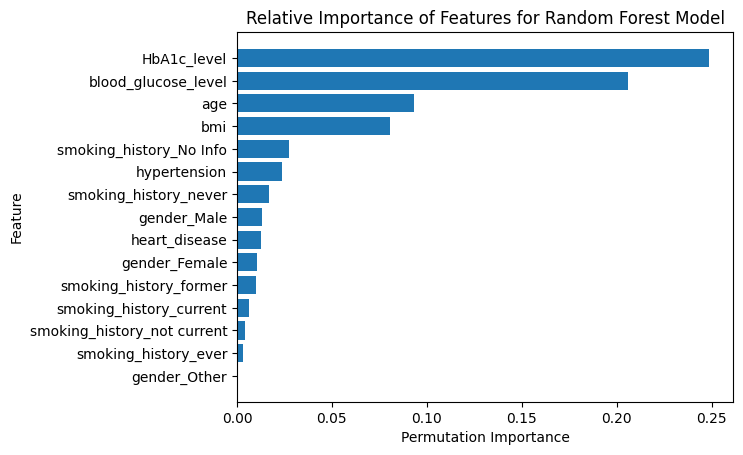

In [ ]:
# create a relative influence graph for the previous random forest model

# Calculate permutation importance for the best model
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a bar plot of the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Relative Importance of Features for Random Forest Model")
plt.show()


In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a logistic regression model
logistic_regression_model = LogisticRegression(random_state=42,max_iter=3500)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the classification report
print(classification_report(y_test, y_pred_lr))

# Create a confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print the confusion matrix
print(confusion_matrix_lr)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_lr = pd.DataFrame(confusion_matrix_lr, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_lr)


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22784
           1       0.88      0.88      0.88     22966

    accuracy                           0.88     45750
   macro avg       0.88      0.88      0.88     45750
weighted avg       0.88      0.88      0.88     45750

[[20134  2650]
 [ 2724 20242]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  20134                2650
Actual Diabetes                      2724               20242


Try Using Scaler to improve the logistic regression

No improvement was found

In [ ]:
# regularize the data and run the previous logistic regression again

# Import the necessary libraries
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logistic_regression_model = LogisticRegression(random_state=42,max_iter=3500)

# Train the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr_scaled = logistic_regression_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_lr_scaled = accuracy_score(y_test, y_pred_lr_scaled)

# Print the classification report
print(classification_report(y_test, y_pred_lr_scaled))

# Create a confusion matrix
confusion_matrix_lr_scaled = confusion_matrix(y_test, y_pred_lr_scaled)

# Print the confusion matrix
print(confusion_matrix_lr_scaled)

# Convert the confusion matrix to a DataFrame
confusion_matrix_df_lr_scaled = pd.DataFrame(confusion_matrix_lr_scaled, columns=["Predicted No Diabetes", "Predicted Diabetes"], index=["Actual No Diabetes", "Actual Diabetes"])

# Print the confusion matrix DataFrame
print(confusion_matrix_df_lr_scaled)


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22784
           1       0.88      0.88      0.88     22966

    accuracy                           0.88     45750
   macro avg       0.88      0.88      0.88     45750
weighted avg       0.88      0.88      0.88     45750

[[20134  2650]
 [ 2730 20236]]
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                  20134                2650
Actual Diabetes                      2730               20236
